# Clip & Categorize GRACE

a. stein 1.19.2023

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

from tqdm.notebook import tqdm

import sys

In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

In [3]:
grace = xr.open_dataset(f'{dm_path}/grace/grace_us.nc')

In [4]:
grace

<xarray.Dataset>
Dimensions:  (time: 1064, lat: 224, lon: 464)
Coordinates:
  * time     (time) datetime64[ns] 2002-04-01 2002-04-08 ... 2022-08-15
  * lat      (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon      (lon) float64 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
Data variables:
    gws      (time, lat, lon) float32 ...
    rtzsm    (time, lat, lon) float32 ...
    sfsm     (time, lat, lon) float32 ...
Attributes:
    author:       a. stein, 9/1/2022
    description:  Percentiles of GRACE-Based percentiles of surface soil mois...

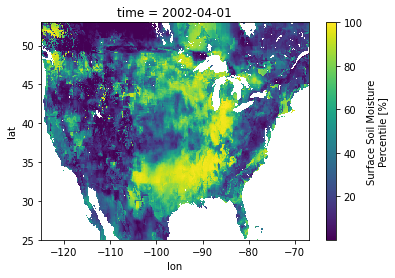

In [5]:
grace.isel(time=0)['sfsm'].plot()

In [6]:
grace_vars = ['gws', 'rtzsm', 'sfsm']

for var in tqdm(grace_vars):
    grace_da = grace[var].copy()
    grace_da = grace_da.rio.write_crs('EPSG:4326', inplace=True)
    grace_da_clip = grace_da.sel(lon=slice(-105))
    grace_da_clip = grace_da_clip.rename({'lon':'x', 'lat':'y'})    
    grace_da_clip = grace_da_clip.rio.reproject('EPSG:5070')
    attrs = grace_da_clip.attrs
    attrs['Clipping'] = 'This selection has been clipped to everything west of longitude 105 degrees within CONUS. EPSG:5070 was picked to preserve area for future computations.'
    attrs['description'] = 'Percentiles of GRACE-Based percentiles of surface soil moisture, root zone soil moisture, groundwater. Data has been provided by CALMIT and NASA at their website: http://nasagrace.unl.edu/Default.aspx'
    attrs['compilation'] = 'a. stein 1/19/2023'
    #del attrs['grid_mapping']
    grace_da_clip.attrs = attrs

    try:
        os.remove(f'{dm_path}/grace/CONUS_105W/grace_{var}.nc')
    except:
        pass

    grace_da_clip.to_netcdf(f'{dm_path}/grace/CONUS_105W/grace_{var}.nc')

    # do some gc
    grace_ds = None
    grace_da = None
    grace_da_clip = None
    

  0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
xr.open_dataset(f'{dm_path}/grace/CONUS_105W/grace_sfsm.nc')

<xarray.Dataset>
Dimensions:      (x: 179, y: 262, time: 1064)
Coordinates:
  * x            (x) float64 -2.911e+06 -2.898e+06 ... -6.403e+05 -6.275e+05
  * y            (y) float64 3.622e+06 3.609e+06 ... 2.863e+05 2.735e+05
  * time         (time) datetime64[ns] 2002-04-01 2002-04-08 ... 2022-08-15
Data variables:
    spatial_ref  int64 ...
    sfsm         (time, y, x) float32 ...